## 4.2.1 글 조회 데이터

#### 코드 4.2 글 조회 데이터 전처리

In [1]:
import os
os.chdir('res')

In [2]:
!python -m tarfile -e read.tar

In [3]:
import os, sys
import tqdm

 
def iterate_data_files(from_dtm, to_dtm):
    from_dtm, to_dtm = map(str, [from_dtm, to_dtm])
    read_root = os.path.join('./', 'read')
    for fname in os.listdir(read_root):
        if len(fname) != len('2018100100_2018100103'):
            continue
        if from_dtm != 'None' and from_dtm > fname:
            continue
        if to_dtm != 'None' and fname > to_dtm:
            continue
        path = os.path.join(read_root, fname)
        yield path, fname
 
data = [];
 
files = sorted([path for path, _ in iterate_data_files('2018100100', '2019022200')])
 
for path in tqdm.tqdm(files, mininterval=1):
    for line in open(path):
        tokens = line.strip().split()
        read_datetime = path[7:17]
        user_id = tokens[0]
        reads = tokens[1:]
        for item in reads:
            data.append([read_datetime, user_id, item])


100%|█████████████████████████████████████████████████████████████████████████████| 3456/3456 [00:17<00:00, 202.99it/s]


#### 코드 4.3  글 조회 데이터 프레임 생성

In [4]:
import pandas as pd
 
read_df = pd.DataFrame(data)
read_df.columns = ['date', 'user_id', 'article_id']
 
read_df.head()

,date,user_id,article_id
0,2018100100,#e208be4ffea19b1ceb5cea2e3c4dc32c,@kty0613_91
1,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@miamiyoung_31
2,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@banksalad_49
3,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@rlfrjsdn_95
4,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@readme999_140


#### 코드 4.4  글 조회 고유값 

In [5]:
read_df.nunique()

date            3456
user_id       296520
article_id    495940
dtype: int64

#### 코드 4.5  사용자별 조회 횟수 

In [6]:
read_df.groupby('user_id').size().describe()

count    296520.000000
mean         70.746705
std         377.173485
min           1.000000
25%           3.000000
50%          10.000000
75%          39.000000
max       83688.000000
dtype: float64

#### 코드 4.6 사용자별 조회수 분포 그래프

In [7]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [8]:
user_read_count_df = read_df.groupby('user_id').size().reset_index().rename(columns = {0: 'count'})

C:\Users\sk8er\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


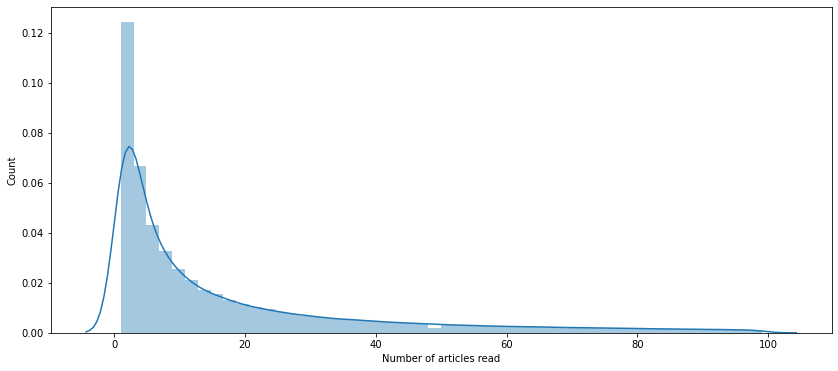

In [9]:
plt.figure(figsize = (14, 6))
sns.distplot(user_read_count_df[user_read_count_df['count'] < 100]['count'])
plt.xlabel('Number of articles read')
plt.ylabel('Count')
plt.show()

#### 코드 4.7  글별 조회 횟수

In [10]:
read_df.groupby('article_id').size().describe()

count    495940.000000
mean         42.299095
std         283.270460
min           1.000000
25%           3.000000
50%           7.000000
75%          24.000000
max       96981.000000
dtype: float64

#### 코드 4.8  인기글 상위 10개

In [11]:
read_df.groupby('article_id').size().sort_values(ascending=False).reset_index().head(10)

,article_id,0
0,@brunch_141,96981
1,@brunch_145,30711
2,@tenbody_1305,25411
3,@intlovesong_28,21702
4,@hyehyodam_19,20506
5,@brunch_140,20033
6,@steven_179,19721
7,@brunch_142,19561
8,@sangheeshyn_66,18910
9,@deckey1985_51,18331


#### 코드 4.9 조회수가 높은 상위 20개 글

In [12]:
poppular_article_df = read_df.groupby('article_id').size().sort_values(ascending=False).reset_index().rename(columns = {0: 'read count'})

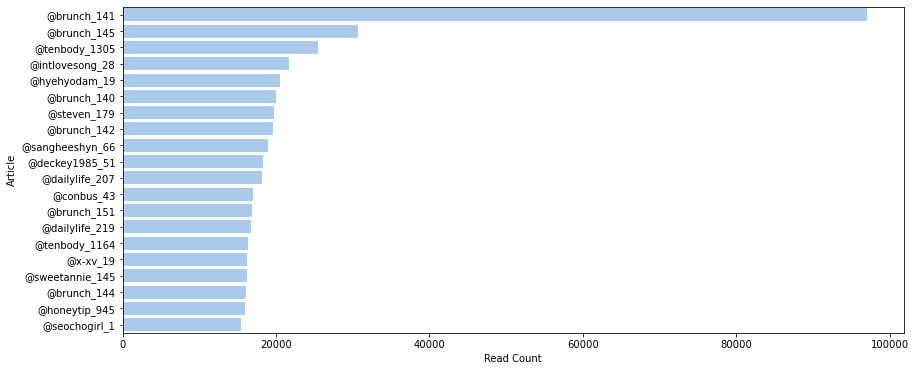

In [13]:
plt.figure(figsize = (14, 6))
sns.set_color_codes("pastel")
sns.barplot(x="read count", y='article_id', data=poppular_article_df[0:20],
            label="Total", color="b")
plt.xlabel('Read Count')
plt.ylabel('Article')
plt.show()

## 4.2.2 글의 메타데이터

#### 코드 4.10 메타데이터 파일 읽기

In [14]:
meta_df = pd.read_json('metadata.json', lines=True)
meta_df.head()

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34


#### 코드 4.11 메타데이터 데이터프레임 형태

In [15]:
meta_df.shape

(643104, 9)

#### 코드 4.12 총 글의 수

In [16]:
meta_df['id'].nunique()

643104

#### 코드 4.13 총 작가 수

In [17]:
meta_df['user_id'].nunique()

19065

#### 코드 4.14 작가별 글 생성 수

In [18]:
meta_df.groupby('user_id').size().describe()

count    19065.000000
mean        33.732179
std         87.706369
min          1.000000
25%          4.000000
50%         11.000000
75%         31.000000
max       4106.000000
dtype: float64

#### 코드 4.15 매거진 정보

In [19]:
meta_df['magazine_id'].nunique()

28028

In [20]:
meta_df[meta_df['magazine_id'] != 0].shape

(482281, 9)

In [21]:
meta_df.groupby('magazine_id').size().describe()

count     28028.000000
mean         22.945055
std         961.348331
min           1.000000
25%           3.000000
50%           8.000000
75%          18.000000
max      160823.000000
dtype: float64

#### 코드 4.16 키워드 정보

In [22]:
meta_df['keyword_num'] = meta_df['keyword_list'].apply(lambda x : len(x))
meta_df[meta_df['keyword_num'] > 0].shape

(573039, 10)

In [23]:
meta_df['keyword_num'].describe()

count    643104.000000
mean          2.567706
std           0.961918
min           0.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: keyword_num, dtype: float64

## 4.2.3 사용자 정보

#### 코드 4.17 사용자 정보 파일 읽기

In [24]:
user_df = pd.read_json('users.json', lines=True)

#### 코드 4.18 사용자 정보 데이터프레임 형태

In [25]:
user_df.shape

(310758, 3)

#### 코드 4.19 사용자 정보 데이터프레임의 컬럼 정보

In [26]:
user_df.columns.tolist() 

['keyword_list', 'following_list', 'id']

#### 코드 4.20 사용자 아이디 수

In [27]:
user_df['id'].nunique()

310758

#### 코드 4.21 사용자별 구독 리스트

In [28]:
user_df['following_list'].head(10)

0                                 [@perytail, @brunch]
1    [@holidaymemories, @wadiz, @sciforus, @dailydu...
2    [@commerceguy, @sunsutu, @kakao-it, @joohoonja...
3    [@amberjeon48, @forsy20, @nemotokki, @hawann, ...
4    [@dwcha7342, @iammento, @kakao-it, @dkam, @ant...
5    [@jumi710, @hana8277, @katarun, @brunch3woz, @...
6    [@gabrieljmh, @megaonic, @cleancode, @simu-loo...
7    [@potatohands, @ggpodori, @chae-pulib, @roysda...
8    [@rmk011, @unitasbrand, @libraryman, @thewater...
9    [@megustastu, @hongmilmil, @keeuyo, @21mission...
Name: following_list, dtype: object

#### 코드 4.22 사용자별 구독 작가 통계

In [29]:
user_df['following_list_len'] = user_df['following_list'].apply(lambda x : len(x))
user_df['following_list_len'].describe()

count    310758.000000
mean          8.420955
std          30.286427
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3528.000000
Name: following_list_len, dtype: float64

In [30]:
user_df[user_df['following_list_len'] == 0].shape

(7268, 4)

#### 코드 4.23 구독자 수 분포

C:\Users\sk8er\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


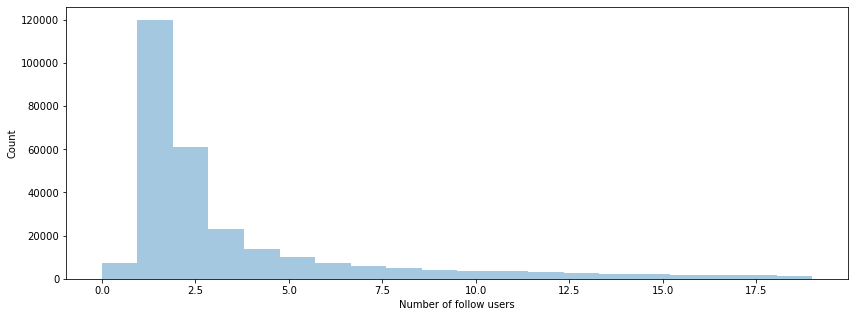

In [31]:
plt.figure(figsize = (14, 5))
sns.distplot(user_df[user_df['following_list_len'] < 20]['following_list_len'], kde=False, bins=20)
plt.xlabel('Number of follow users')
plt.ylabel('Count')
plt.show()

#### 코드 4.24 사용자 키워드 리스트

In [32]:
user_df['keyword_list_len'] = user_df['keyword_list'].apply(lambda x : len(x))

In [33]:
user_df[user_df['keyword_list_len'] != 0]['keyword_list_len'].describe()

count    11544.000000
mean        40.855249
std        196.652621
min          1.000000
25%          4.000000
50%         11.000000
75%         30.000000
max       8265.000000
Name: keyword_list_len, dtype: float64

## 4.2.4 매거진 정보

#### 코드 4.25 매거진 정보

In [34]:
magazine_df = pd.read_json('magazine.json', lines=True)

In [35]:
magazine_df.shape

(27967, 2)

In [36]:
magazine_df.head()

,magazine_tag_list,id
0,"[브런치북, 육아일기, 대화법, 들려주고픈이야기]",38842
1,"[tea, food]",11540
2,[food],11541
3,"[브런치북, 일상, 시, 사람]",11546
4,"[감성에세이, 노래, 음악에세이]",11544


#### 코드 4.26 매거진 태그 리스트 정보

In [37]:
magazine_df['magazine_tag_list_len'] = magazine_df['magazine_tag_list'].apply(lambda x : len(x))

In [38]:
magazine_df['magazine_tag_list_len'].describe()

count    27967.000000
mean         2.856366
std          0.682429
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          6.000000
Name: magazine_tag_list_len, dtype: float64

## 4.2.5 예측 대상 사용자 정보

In [39]:
!python -m tarfile -e predict.tar

#### 코드 4.27 dev.users 사용자 정보

In [40]:
dev_user_df = pd.read_csv('predict/dev.users', header=None)

In [41]:
dev_user_df.columns = ['id']

In [42]:
dev_user_df.shape

(3000, 1)

In [43]:
dev_user_df.head()

,id
0,#d6866a498157771069fdf15361cb012b
1,#f963fb8c5d9d14d503fc4e80bd8617b4
2,#87a6479c91e4276374378f1d28eb307c
3,#677e984e245b344f61dc5d3cc1f352c8
4,#519f45eb14e4807e8714fb7e835463eb


#### 코드 4.28 test.users 사용자 정보

In [44]:
test_user_df = pd.read_csv('predict/test.users', header=None)

In [45]:
test_user_df.columns = ['id']

In [46]:
test_user_df.shape

(5000, 1)

In [47]:
test_user_df[test_user_df['id'].isin(dev_user_df['id'])].shape

(3000, 1)

#### 코드 4.29 test.users 사용자의 글 조회 수

In [48]:
read_user_count_df = read_df.groupby('user_id').size().reset_index()

In [49]:
read_user_count_df.describe()

,0
count,296520.000000
mean,70.746705
std,377.173485
min,1.000000
25%,3.000000
50%,10.000000
75%,39.000000
max,83688.000000


In [50]:
test_user_read_info = read_user_count_df[read_user_count_df['user_id'].isin(test_user_df['id'])]

In [51]:
test_user_read_info.describe()

,0
count,4496.000000
mean,540.616548
std,1255.179434
min,1.000000
25%,50.000000
50%,182.000000
75%,549.000000
max,40914.000000


#### 코드 4.30 test.users 사용자의 구독 수

In [52]:
user_df['following_list_len'].describe()

count    310758.000000
mean          8.420955
std          30.286427
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3528.000000
Name: following_list_len, dtype: float64

In [53]:
test_user_follow_info = user_df[user_df['id'].isin(test_user_df['id'])]

In [54]:
test_user_follow_info['following_list_len'].describe()

count    4988.000000
mean       26.620088
std        64.982802
min         0.000000
25%         2.000000
50%         8.000000
75%        24.000000
max      1293.000000
Name: following_list_len, dtype: float64